In [1]:
from IPython.display import Image

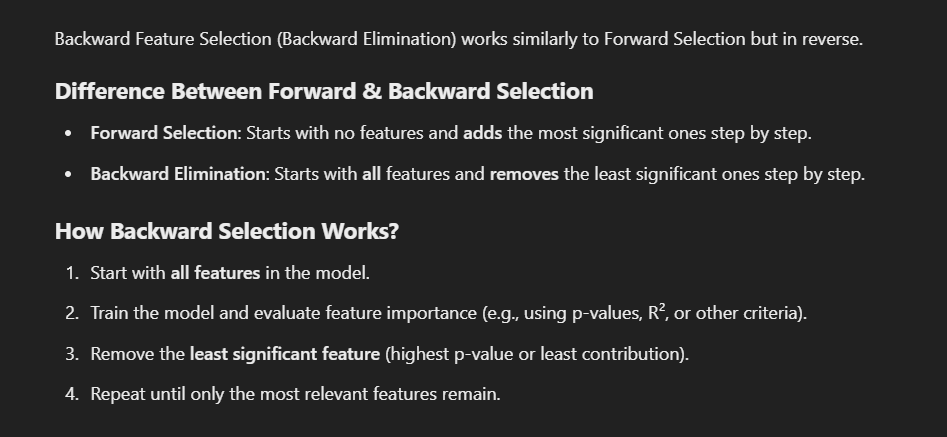

In [3]:
Image("image_1.png")

In [5]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 📌 Step 1: Create Sample Data
data = {
    "Age": [25, 30, 35, 40, 22, 50, 45, 28, 33, 38, 55, 60, 27, 42, 48, 53, 32, 37, 26, 29],
    "Salary": [50000, 60000, 75000, 80000, 45000, 90000, 85000, 55000, 70000, 78000, 95000, 110000, 52000, 87000, 91000, 108000, 66000, 77000, 49000, 58000],
    "Experience": [2, 5, 7, 10, 1, 15, 12, 3, 6, 8, 17, 20, 4, 11, 14, 18, 5, 9, 2, 4],
    "Education Level": [1, 2, 2, 3, 1, 3, 3, 1, 2, 3, 3, 4, 1, 3, 3, 4, 2, 3, 1, 1],  # Categorical (Ordinal)
    "Loan Approved": [0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0],  # Target Variable
}

df = pd.DataFrame(data)

# 📌 Step 2: Define Features and Target
X = df.drop(columns=["Loan Approved"])  # Features
y = df["Loan Approved"]  # Target variable

# 📌 Step 3: Split Data (80% Train, 20% Test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 📌 Step 4: Standardize Data (Only for Numeric Features)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 📌 Step 5: Define Model
model = LogisticRegression()

# 📌 Step 6: Apply Backward Feature Selection (Starts with All, Removes Step by Step)
sfs_backward = SequentialFeatureSelector(model, n_features_to_select=2, direction="backward")
X_train_selected = sfs_backward.fit_transform(X_train_scaled, y_train)
X_test_selected = sfs_backward.transform(X_test_scaled)

# 📌 Step 7: Train the Model with Selected Features
model.fit(X_train_selected, y_train)
score = model.score(X_test_selected, y_test)

# 📌 Step 8: Print Selected Features and Model Score
print("✅ Backward Selected Features:", list(X.columns[sfs_backward.get_support()]))
print("🚀 Model Accuracy:", score)


✅ Backward Selected Features: ['Experience', 'Education Level']
🚀 Model Accuracy: 1.0
